<a href="https://colab.research.google.com/github/D4rc0r/Analog_to_Digital_Converter/blob/master/Segunda_entrega_DFO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diseño de filtros óptimos 2021-2
Profesor: Luis Enrique Avendaño

Estudiantes: Ivan Dario Mallama, 
            Styven Torres
            
Departamento de ingeniería eléctrica, electrónica y computación Universidad Nacional de Colombia - sede Manizales

Del libro guia, Diseño de Filtros Óptimos, se desarrolla los siguientes ejemplos: 

Ejemplo 3.5.1 Se volverá al problema original de tratar de estimar la resistencia $x$ de un resistor no marcado sobre la base de $k$ medidas ruidosas generadas por un multímetro. Sin embargo, no se desea esperar hasta tener todas las medidas para tener un estimado. Se desea modificar recursivamente el estimado de $x$ cada vez que se obtenga una nueva medida. En un tiempo de muestreo $k$ la medida es
$$
\begin{aligned}
&y_{k}=H_{k} x+w_{k} \\
&H_{k}=1 \\
&R_{k}=\mathscr{E}\left\{w_{k}^{2}\right\}
\end{aligned}
$$
Para este problema, la matriz de medida $\mathbf{H}_{k}$ es un escalar y la covarianza del ruido de la medida $\mathbf{R}_{k}$ también es un escalar. Se supone que cada medida tiene la misma covarianza, así la covarianza del ruido de la medida $\mathbf{R}_{k}$ no es una función de $k$ y puede escribirse como $R$. Inicialmente, antes de tomar cualquier medida, se tiene alguna idea del valor de la resistencia $x$


$\begin{aligned}
&\text { solucion:
para desarrollar el ejemplo se sigue los pasos establecidos en el primer algoritmo:} \\ \\
&\text { Algoritmo } \mathbf{1} \text { Estimación recursiva por mínimos cuadrados } \\
&\text { Inicialización: } \\
&\hat{\mathbf{x}}_{0}=\mathscr{E}\{\mathbf{x}\} \\
&\mathbf{P}_{0}=\mathscr{E}\left\{\left(\mathbf{x}-\hat{\mathbf{x}}_{0}\right)\left(\mathbf{x}-\hat{\mathbf{x}}_{0}\right)^{\top}\right\} \\
&\left\{\text { Si no hay conocimiento disponible de } \mathbf{x} \text { antes de que las medidas sean tomadas, entonces } \mathbf{P}_{0}=\infty \mathbf{I}\right. \text {. Si } \\
&\text { hay conocimiento absoluto de } \left.\mathbf{x} \text { antes de que las medidas sean tomadas, entonces } \mathbf{P}_{0}=0 .\right\} \\
&\text { Cómputo: } \\
&\text { 1. Obtención del vector de medición } \mathbf{y}_{k} \text {. } \\
&\text { for } k=1 \text { to } N \text { do } \\
&\mathbf{y}_{k}=\mathbf{H}_{k} \mathbf{x}_{k}+\mathbf{w}_{k} \\
&\text { end for } \quad\left\{\mathbf{w}_{k} \sim N I D\left(0, \mathbf{R}_{k}\right)\right\} \\
&\text { 2. Actualización del valor estimado de } \mathbf{x} \text { y la covarianza del error de estimación } \mathbf{P} \text {. } \\
&\text { for } k=1 \text { to } N \text { do } \\
&\quad \mathbf{K}_{k}=\mathbf{P}_{k-1} \mathbf{H}_{k}^{\top}\left(\mathbf{H}_{k} \mathbf{P}_{k-1} \mathbf{H}_{k}^{\top}+\mathbf{R}_{k}\right)^{-1} \\
&\quad \hat{\mathbf{x}}_{k}=\hat{\mathbf{x}}_{k-1}+\mathbf{K}_{k}\left(\mathbf{y}_{k}-\mathbf{H}_{k} \hat{\mathbf{x}}_{k-1}\right) \\
&\quad \mathbf{P}_{k}=\left(\mathbf{I}-\mathbf{K}_{k} \mathbf{H}_{k}\right) \mathbf{P}_{k-1}\left(\mathbf{I}-\mathbf{K}_{k} \mathbf{H}_{k}\right)^{\top}+\mathbf{K}_{k} \mathbf{R}_{k} \mathbf{K}_{k}^{\top} \\
&\text { end for }
\end{aligned}$

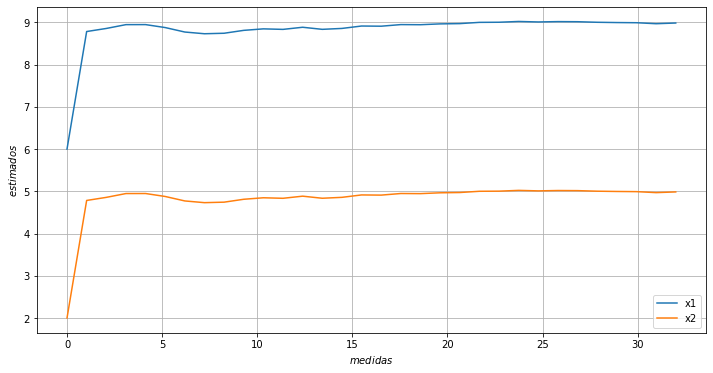

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg.linalg import transpose
R=0.01

#p=[np.array([[0.099,0],[0,0.099]])]
p=[np.array([[1,0],[0,1]])]

x=np.array([[9],[5]]) #Es un vector de valores constantes 

xi=[np.array([[6],[2]])] #Es el mejor estimado de x

w = np.random.normal(0, 1,32)

k = []
y = []

I = np.array([[1,0],[0,1]])

for i in range (1,33):
  
  H=np.array([[1,1]])
  Ht=np.transpose(H)

  yi=np.matmul(H,x)+w[i-1]
  y.append(yi) #Vector de medidas ruidosas
  
  k1=np.matmul(p[i-1],Ht)
  k2=np.power(np.matmul(np.matmul(H,p[i-1]),Ht)+R,-1)
  k.append(k1*k2) # Matriz de ganancia del estimador


  xi1=np.matmul(k[i-1],np.subtract(yi,np.matmul(H,xi[i-1])))
  xi.append(np.add(xi[i-1],xi1))  #Actualizacion del valor estimado de x

  p1=np.subtract(I,np.matmul(k[i-1],H))
  p2=np.transpose(p1)
  p3=np.matmul(np.matmul(p1,p[i-1]),p2)
  p4=np.matmul(k[i-1]*R,np.transpose(k[i-1]))
  p.append(p3+p4) # Covarianza del error de estimacion

estmt1=[]
estmt2=[]
cvrz1=[]
cvrz2=[]

for i in range (0,32):
  estmt=xi[i] #valor estimado de x
  estmt1.append(estmt[0][0])
  estmt2.append(estmt[1][0])

  cvrz=p[i] #covarianza del error de estimacion
  cvrz1.append(cvrz[0][0])
  cvrz2.append(cvrz[1][1])

Axis=np.linspace(0,32,32)
plt.figure(figsize=(12,6))

plt.plot(Axis,estmt1,label='x1')
plt.plot(Axis,estmt2,label='x2')
#plt.xlabel("$paso$ $del$ $tiempo$")
plt.xlabel("$medidas$")
plt.ylabel("$estimados$")
plt.grid()
plt.legend()


plt.show()


In [ ]:
#plt.figure(figsize=(12,6))

#plt.plot(Axis,cvrz1,label='P(1,1)')
#plt.plot(Axis,cvrz2,label='P(2,2)')
#plt.ylabel("$Varianza$")
#plt.xlabel("$paso$ $del$ $tiempo$")
#plt.grid()
#plt.legend()


#plt.show()

Ejemplo 3.5.2 Supóngase que se desea ajustar una línea recta a un conjunto de datos puntuales. El problema de ajuste datos lineales se puede escribir como
$$
\begin{aligned}
y_{k} &=x_{1}+x_{2} t_{k}+w_{k} \\
\mathscr{E}\left\{w_{k}^{2}\right\} &=R_{k}
\end{aligned}
$$
donde $t_{k}$ es la variable independiente (quizá el tiempo), $y_{k}$ es el dato ruidoso. Se desea encontrar la relación lineal entre $y_{k}$ y $t_{k}$. En otras palabras se desea estimar las constantes $x_{1}$ y $x_{2}$. La matriz de medidas se puede escribir como
$$
\mathbf{H}_{k}=\left[\begin{array}{ll}
1 & t_{k}
\end{array}\right]
$$

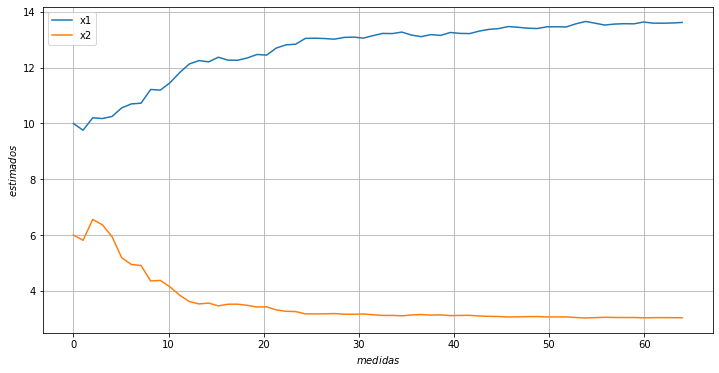

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg.linalg import transpose
R=0.99

p=[np.array([[1,0],[0,1]])]

x=np.array([[14],[3]]) #Es un vector de valores constantes 

xi=[np.array([[10],[6]])] #Es el mejor estimado de x

w = np.random.normal(0, 0.99, 64)

k = []
y = []

I = np.array([[1,0],[0,1]])

for i in range (1,65):
  tk= 0.27*i+0.51
 
  H=np.array([[1,tk]])
  Ht=np.transpose(H)

  yi=np.matmul(H,x)+w[i-1]
  y.append(yi) #Vector de medidas ruidosas
  
  k1=np.matmul(p[i-1],Ht)
  k2=np.power(np.matmul(np.matmul(H,p[i-1]),Ht)+R,-1)
  k.append(k1*k2) # Matriz de ganancia del estimador


  xi1=np.matmul(k[i-1],np.subtract(yi,np.matmul(H,xi[i-1])))
  xi.append(np.add(xi[i-1],xi1))  #Actualizacion del valor estimado de x

  p1=np.subtract(I,np.matmul(k[i-1],H))
  p2=np.transpose(p1)
  p3=np.matmul(np.matmul(p1,p[i-1]),p2)
  p4=np.matmul(k[i-1]*R,np.transpose(k[i-1]))
  p.append(p3+p4) # Covarianza del error de estimacion

estmt1=[]
estmt2=[]
cvrz1=[]
cvrz2=[]

for i in range (0,64):
  estmt=xi[i] #valor estimado de x
  estmt1.append(estmt[0][0])
  estmt2.append(estmt[1][0])

  cvrz=p[i] #covarianza del error de estimacion
  cvrz1.append(cvrz[0][0])
  cvrz2.append(cvrz[1][1])

Axis=np.linspace(0,64,64)
plt.figure(figsize=(12,6))

plt.plot(Axis,estmt1,label='x1')
plt.plot(Axis,estmt2,label='x2')
#plt.xlabel("$paso$ $del$ $tiempo$")
plt.xlabel("$medidas$")
plt.ylabel("$estimados$")
plt.grid()
plt.legend()


plt.show()


In [ ]:
#plt.figure(figsize=(12,6))

#plt.plot(Axis,cvrz1,label='P(1,1)')
#plt.plot(Axis,cvrz2,label='P(2,2)')
#plt.ylabel("$Varianza$")
#plt.xlabel("$paso$ $del$ $tiempo$")
#plt.grid()
#plt.legend()


#plt.show()


Ejemplo $3.5 .3$ Supóngase que un tanque contiene una concentración $x_{1}$ del químico 1 y una concentración $x_{2}$ del químico $2 .$ Se tiene una instrumentación que puede detectar la concentración combinada $\left(x_{1}+x_{2}\right)$ de los dos químicos, pero la instrumentación no puede distinguir ninguno de los químicos por separado.

Se elimina del tanque el químico 2 a través de un proceso de lixiviación de modo que su concentración decrece en un $1 \%$ por cada medida. La ecuación de medición está dada por
$$
\begin{aligned}
y_{k} &=x_{1}+0.99^{k-1} x_{2}+w_{k} \\
&=\left[\begin{array}{ll}
1 & 0.99^{k-1}
\end{array}\right] \mathbf{x}+w_{k}
\end{aligned}
$$
donde $w_{k}$ es el ruido de la medida, el cual es una variable aleatoria de media cero y varianza $R=0.01$. Supóngase que $x_{1}=10 $  y  $ x_{2}=5$.

Además, supóngase que los estimados iniciales son $\hat{x}_{1}=8$ y $\hat{x}_{2}=7$, con una varianza del error de estimación $\mathbf{P}_{0}=\mathbf{I}$.

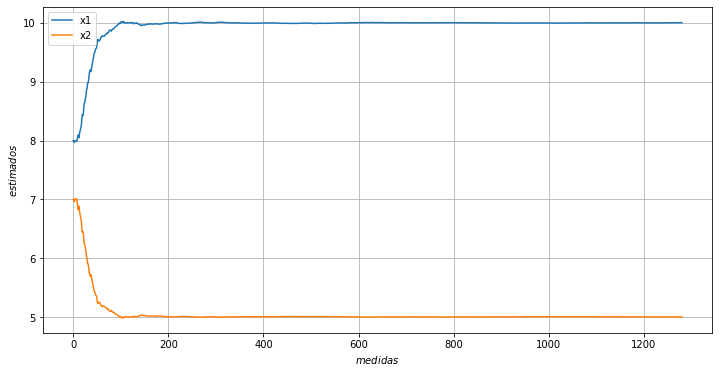

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg.linalg import transpose
R=0.1 # Nota: se debe proteger el codigo para que los resultados sean interpretables que no es posible para valores degativos de R
p=[np.array([[1,0],[0,1]])]

x=np.array([[10],[5]]) #Es un vector de valores constantes 

xi=[np.array([[8],[7]])] #Es el mejor estimado de x

w = np.random.normal(0, 0.1, 1280)

k = []
y = []

I = np.array([[1,0],[0,1]])

for i in range (1,1281):

  H=np.array([[np.power(0.99,i-1),1]])
  Ht=np.transpose(H)

  yi=np.matmul(H,x)+w[i-1]
  y.append(yi) #Vector de medidas ruidosas
  
  k1=np.matmul(p[i-1],Ht)
  k2=np.power(np.matmul(np.matmul(H,p[i-1]),Ht)+R,-1)
  k.append(k1*k2) # Matriz de ganancia del estimador


  xi1=np.matmul(k[i-1],np.subtract(yi,np.matmul(H,xi[i-1])))
  xi.append(np.add(xi[i-1],xi1))  #Actualizacion del valor estimado de x

  p1=np.subtract(I,np.matmul(k[i-1],H))
  p2=np.transpose(p1)
  p3=np.matmul(np.matmul(p1,p[i-1]),p2)
  p4=np.matmul(k[i-1]*R,np.transpose(k[i-1]))
  p.append(p3+p4) # Covarianza del error de estimacion

estmt1=[]
estmt2=[]
cvrz1=[]
cvrz2=[]

for i in range (0,1280):
  estmt=xi[i] #valor estimado de x
  estmt1.append(estmt[0][0])
  estmt2.append(estmt[1][0])

  cvrz=p[i] #covarianza del error de estimacion
  cvrz1.append(cvrz[0][0])
  cvrz2.append(cvrz[1][1])

Axis=np.linspace(0,1280,1280)

plt.figure(figsize=(12,6))

plt.plot(Axis,estmt1,label='x1')
plt.plot(Axis,estmt2,label='x2')
#plt.xlabel("$paso$ $del$ $tiempo$")
plt.xlabel("$medidas$")
plt.ylabel("$estimados$")
plt.grid()
plt.legend()


plt.show()

Gracias al metodo de estimacion por recursividad apreciamos como despues de ciertas medidas la grafica se ajusta a los verdaderos valores de $x_{1}$ y $x_{2}$

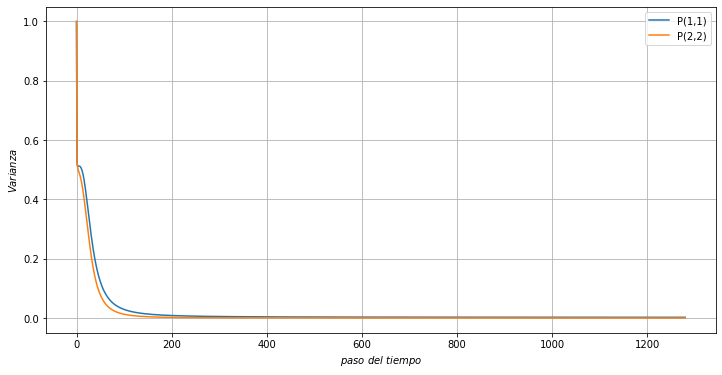

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(Axis,cvrz1,label='P(1,1)')
plt.plot(Axis,cvrz2,label='P(2,2)')
plt.ylabel("$Varianza$")
plt.xlabel("$paso$ $del$ $tiempo$")
plt.grid()
plt.legend()


plt.show()

Con la grafica podemos caer en cuenta que la covarianza del error es mayor al inicio pero decrece de manera rapida hasta que se vuelve cero, eso quiere decir que despues de ciertas muestras el resultado es un valor muy confiable.